# Загрузка и анализ данных

In [1]:
!pip install -q -U scikit-learn
!pip install -q -U aiogram
!pip install -q typing-extensions==4.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linu

In [2]:
!pip install -q -U wldhx.yadisk-direct nltk pandarallel pymorphy2 pandas
!curl -L $(yadisk-direct https://disk.yandex.ru/d/Ihh18yf4807QPA) -o data.zip
!unzip data.zip

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 63.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:-

In [3]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
import joblib
nltk.download('stopwords')
import pandas as pd
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
pd.set_option('max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer

from scipy.sparse import hstack
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_csv('final_dataset.csv' )

In [ ]:
df.sample(1)

,title,text,topic,date
487718,«Народный собор» предложил вернуть уголовную ответственность за гомосексуализм,"Общественная организация «Народный собор» предложила вернуть в России уголовную ответственность за «мужеложество». Об этом 21 ноября сообщает «Интерфакс» со ссылкой на лидера петербургского отделения собора Анатолия Артюха. По словам собеседника агентства, сейчас собор обращается с этой инициативой к российскому обществу. В дальнейшем, по его словам, они обратятся напрямую к депутатам Госдумы и президенту России. Когда это произойдет, он не уточнил. Артюх пояснил, что введенный в стране закон о запрете пропаганды гомосексуализма среди детей, который должен был остановить «распространение порока», показал свою неэффективность. «Мы вынуждены констатировать тот факт, что данный закон в целом по стране не исполняется», — отметил представитель собора. Ответственность за гомосексуализм была предусмотрена советским уголовным кодексом. Статья, по которой максимальное наказание составляло восемь лет лишения свободы, просуществовала с 1934 по 1993 год. «Народный собор» был создан в 2005 году. Организация называет себя выразителем мнения православной и патриотической общественности. В частности, она известна тем, что в 2012 году выступила с инициативой введения в Москве запрета на пропаганду гомосексуализма. Столичная дума не стала рассматривать этот закон, однако позже он был принят на федеральном уровне. Также «Народный собор» был среди тех, кто добился в 2006 году уголовного преследования организаторов выставки «Запретное искусство».",Россия,2013/11/21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714940 entries, 0 to 714939
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   714940 non-null  object
 1   text    714935 non-null  object
 2   topic   714940 non-null  object
 3   date    714940 non-null  object
dtypes: object(4)
memory usage: 21.8+ MB


In [5]:
df=df[df.text.notna()]
df=df[df.title.notna()]

In [ ]:
df.describe()

,title,text,topic,date
count,714935,714935,714935,714935
unique,712195,714006,11,7026
top,В Москве объявлено штормовое предупреждение,"РИА ""Новости""",Россия,2008/12/08
freq,21,291,160442,260


In [6]:
df['year'] = df.date.apply(lambda x: int(x.split('/')[0]))

In [ ]:
l = sorted([i for i in Counter(df['year']).items()], key=lambda x: x[0])

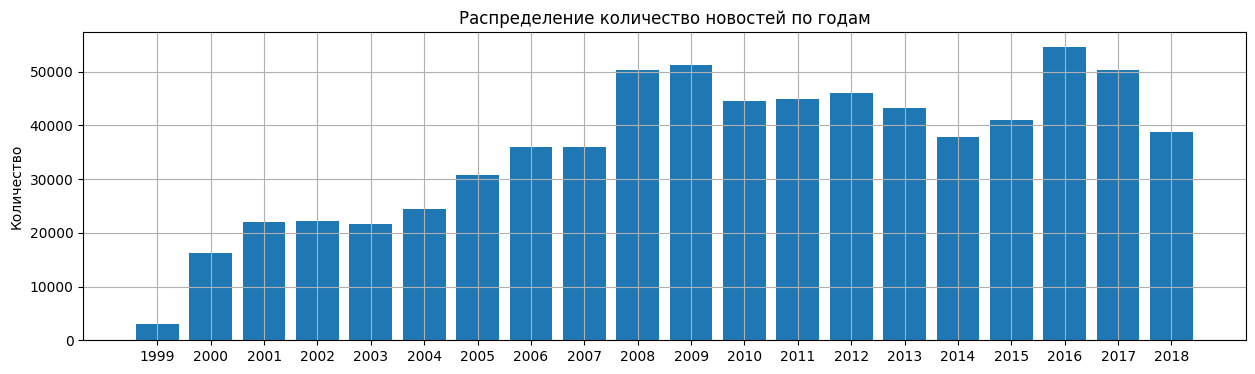

In [ ]:
plt.figure(figsize=(15,4))
year = [i[0] for i in l]
counts = [i[1] for i in l]
plt.bar(year, counts,)
plt.ylabel('Количество')
plt.title('Распределение количество новостей по годам')
plt.xticks(range(1999, 2019))
plt.grid()
plt.show()

In [ ]:
d = {}
for topic in df.topic.unique():
    cnt = Counter(df.loc[df.topic==topic, 'year'])
    d[topic] = np.array([cnt[k] for k in range(1999, 2019)])

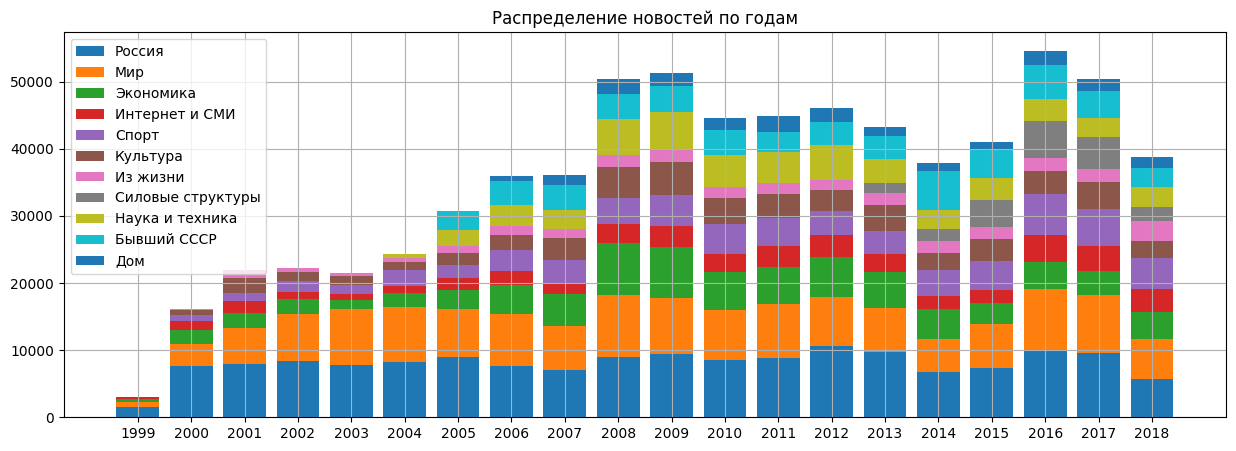

In [ ]:
species = list(range(1999, 2019))
weight_counts = d
width = 0.8
fig, ax = plt.subplots(figsize=(15,5))
bottom = np.zeros(20)
for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax.set_title("Распределение новостей по годам")
ax.legend()
ax.set_xticks(range(1999, 2019))
plt.grid()
plt.show()

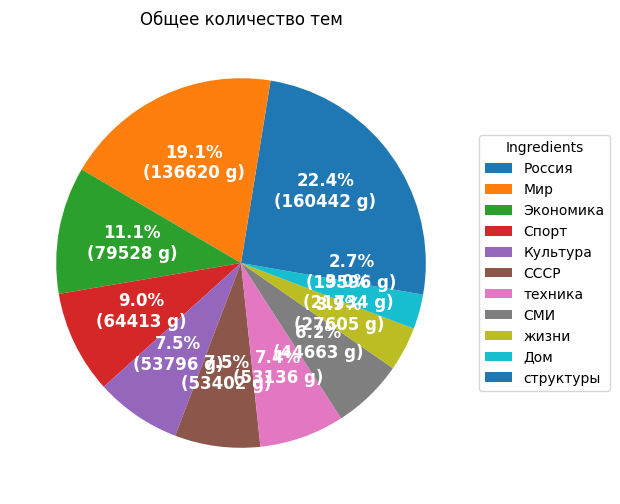

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6), subplot_kw=dict(aspect="equal"))

recipe = [f'{i[1]} {i[0]}' for i in list(df.topic.value_counts().items())]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Общее количество тем")

plt.show()

In [ ]:
df['date'] = df.date.apply(lambda x: pd.to_datetime(x.replace('/','-')))

In [ ]:
df['date'].max()

Timestamp('2018-12-15 00:00:00')

In [ ]:
df['date'].min()

Timestamp('1999-08-31 00:00:00')

In [ ]:
data = Counter(df['date'])

In [ ]:
# @title Текст заголовка по умолчанию
%%writefile calplot.py
import calendar
import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

from matplotlib.colors import ColorConverter, ListedColormap
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

def yearplot(data, year=None, how='sum',
             vmin=None, vmax=None,
             cmap='viridis', fillcolor='whitesmoke',
             linewidth=1, linecolor=None, edgecolor='gray',
             daylabels=calendar.day_abbr[:], dayticks=True,
             dropzero=None,
             textformat=None, textfiller='', textcolor='black',
             monthlabels=calendar.month_abbr[1:], monthlabeloffset=15,
             monthticks=True,
             ax=None, **kwargs):
    """
    Plot one year from a timeseries as a calendar heatmap.

    Parameters
    ----------
    data : Series
        Data for the plot. Must be indexed by a DatetimeIndex.
    year : integer
        Only data indexed by this year will be plotted. If `None`, the first
        year for which there is data will be plotted.
    how : string
        Method for resampling data by day. If `None`, assume data is already
        sampled by day and don't resample. Otherwise, this is passed to Pandas
        `Series.resample`.
    vmin, vmax : floats
        Values to anchor the colormap. If `None`, min and max are used after
        resampling data by day.
    cmap : matplotlib colormap name or object
        The mapping from data values to color space.
    fillcolor : matplotlib color
        Color to use for days without data.
    linewidth : float
        Width of the lines that will divide each day.
    linecolor : color
        Color of the lines that will divide each day. If `None`, the axes
        background color is used, or 'white' if it is transparent.
    daylabels : list
        Strings to use as labels for days, must be of length 7.
    dayticks : list or int or bool
        If `True`, label all days. If `False`, don't label days. If a list,
        only label days with these indices. If an integer, label every n day.
    dropzero : bool
        If `True`, don't fill a color for days with a zero value.
    monthlabels : list
        Strings to use as labels for months, must be of length 12.
    monthlabeloffset : integer
        Day offset for labels for months to adjust horizontal alignment.
    monthticks : list or int or bool
        If `True`, label all months. If `False`, don't label months. If a
        list, only label months with these indices. If an integer, label every
        n month.
    edgecolor : color
        Color of the lines that will divide months.
    textformat : string
        Text format string for grid cell text
    textfiller : string
        Fallback text for grid cell text for cells with no data
    textcolor : color
        Color of the grid cell text
    ax : matplotlib Axes
        Axes in which to draw the plot, otherwise use the currently-active
        Axes.
    kwargs : other keyword arguments
        All other keyword arguments are passed to matplotlib `ax.pcolormesh`.

    Returns
    -------
    ax : matplotlib Axes
        Axes object with the calendar heatmap.

    """

    if year is None:
        year = data.index.sort_values()[0].year

    if how is None:
        # Assume already sampled by day.
        by_day = data
    else:
        # Sample by day.
        by_day = data.resample('D').agg(how)

    # Default to dropping zero values for a series with over 50% of rows being zero.
    if not (dropzero is False) and (by_day[by_day == 0].count() > 0.5 * by_day.count()):
        dropzero = True

    if dropzero:
        by_day = by_day.replace({0: np.nan}).dropna()

    # Min and max per day.
    if vmin is None:
        vmin = by_day.min()
    if vmax is None:
        vmax = by_day.max()

    if ax is None:
        ax = plt.gca()

    if linecolor is None:
        # Unfortunately, linecolor cannot be transparent, as it is drawn on
        # top of the heatmap cells. Therefore it is only possible to mimic
        # transparent lines by setting them to the axes background color. This
        # of course won't work when the axes itself has a transparent
        # background so in that case we default to white which will usually be
        # the figure or canvas background color.
        linecolor = ax.get_facecolor()
        if ColorConverter().to_rgba(linecolor)[-1] == 0:
            linecolor = 'white'

    # Filter on year.
    try:
      # could be empty due to `dropzero`
      by_day = by_day[str(year)]
    except KeyError:
      pass

    # Add missing days.
    by_day = by_day.reindex(
        pd.date_range(start=str(year), end=str(year + 1),
                      freq='D', tz=by_day.index.tzinfo)[:-1])

    # Create data frame we can pivot later.
    by_day = pd.DataFrame({'data': by_day,
                           'fill': 1,
                           'day': by_day.index.dayofweek,
                           'week': by_day.index.isocalendar().week})

    # There may be some days assigned to previous year's last week or
    # next year's first week. We create new week numbers for them so
    # the ordering stays intact and week/day pairs unique.
    by_day.loc[(by_day.index.month == 1) & (by_day.week > 50), 'week'] = 0
    by_day.loc[(by_day.index.month == 12) & (by_day.week < 10), 'week'] \
        = by_day.week.max() + 1

    # Pivot data on day and week and mask NaN days.
    plot_data = by_day.pivot(index='day', columns='week', values='data').values[::-1]
    plot_data = np.ma.masked_where(np.isnan(plot_data), plot_data)

    # Do the same for all days of the year, not just those we have data for.
    fill_data = by_day.pivot(index='day', columns='week', values='fill').values[::-1]
    fill_data = np.ma.masked_where(np.isnan(fill_data), fill_data)

    # Draw heatmap for all days of the year with fill color.
    ax.pcolormesh(fill_data, vmin=0, vmax=1, cmap=ListedColormap([fillcolor]))

    # Draw heatmap.
    kwargs['linewidth'] = linewidth
    kwargs['edgecolors'] = linecolor
    ax.pcolormesh(plot_data, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)

    # Limit heatmap to our data.
    ax.set(xlim=(0, plot_data.shape[1]), ylim=(0, plot_data.shape[0]))

    # Square cells.
    ax.set_aspect('equal')

    # Remove spines and ticks.
    for side in ('top', 'right', 'left', 'bottom'):
        ax.spines[side].set_visible(False)
    for axis in (ax.xaxis, ax.yaxis):
        axis.set_tick_params(which='both', length=0)

    # Get indices for monthlabels.
    if monthticks is True:
        monthticks = range(len(monthlabels))
    elif monthticks is False:
        monthticks = []

    # Get indices for daylabels.
    if dayticks is True:
        dayticks = range(len(daylabels))
    elif dayticks is False:
        dayticks = []

    ax.set_xlabel('')
    ax.set_xticks([by_day.loc[pd.Timestamp(
                   datetime.date(year, i + 1, monthlabeloffset))].week
                   for i in monthticks])
    ax.set_xticklabels([monthlabels[i] for i in monthticks])

    ax.set_ylabel('')
    ax.yaxis.set_ticks_position('right')
    ax.set_yticks([6 - i + 0.5 for i in dayticks])
    ax.set_yticklabels([daylabels[i] for i in dayticks], rotation='horizontal',
                       va='center')

    # Text in mesh grid if format is specified.
    if textformat is not None:
        for y in range(plot_data.shape[0]):
            for x in range(plot_data.shape[1]):
                content = ''
                masked = plot_data[y, x]
                if masked is np.ma.masked:
                    if fill_data[y, x] == 1:
                        content = textfiller
                else:
                    content = textformat.format(masked)
                ax.text(x + 0.5, y + 0.5, content, color=textcolor,
                         ha='center', va='center')

    # Month borders code credited to https://github.com/rougier/calendar-heatmap
    xticks = []
    start = datetime.datetime(year, 1, 1).weekday()
    for month in range(1, 13):
        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)
        y0 = 7 - first.weekday()
        y1 = 7 - last.weekday()
        x0 = (int(first.strftime('%j'))+start-1)//7
        x1 = (int(last.strftime('%j'))+start-1)//7
        P = [(x0, y0),
             (x0+1, y0),
             (x0+1, 7),
             (x1+1, 7),
             (x1+1, y1-1),
             (x1, y1-1),
             (x1, 0),
             (x0, 0) ]
        xticks.append(x0 + (x1-x0+1)/2)
        poly = Polygon(P, edgecolor=edgecolor, facecolor='None',
                       linewidth=linewidth, zorder=20, clip_on=False)
        ax.add_artist(poly)

    return ax


def calplot(data, how='sum',
            yearlabels=True, yearascending=True,
            yearlabel_kws=None, subplot_kws=None, gridspec_kws=None,
            figsize=None, fig_kws=None, colorbar=None,
            suptitle=None, suptitle_kws=None,
            tight_layout=True, **kwargs):
    """
    Plot a timeseries as a calendar heatmap.

    Parameters
    ----------
    data : Series
        Data for the plot. Must be indexed by a DatetimeIndex.
    how : string
        Method for resampling data by day. If `None`, assume data is already
        sampled by day and don't resample. Otherwise, this is passed to Pandas
        `Series.resample`.
    figsize : (float, float)
        Size of figure for the plot.
    suptitle : string
        Title for the plot.
    yearlabels : bool
       Whether or not to draw the year label for each subplot.
    yearascending : bool
       Sort the calendar in ascending or descending order.
    yearlabel_kws : dict
       Keyword arguments passed to the matplotlib `set_ylabel` call which is
       used to draw the year for each subplot.
    subplot_kws : dict
        Keyword arguments passed to the matplotlib `subplots` call.
    gridspec_kws : dict
        Keyword arguments passed to the matplotlib `GridSpec` constructor used
        to create the grid the subplots are placed on.
    fig_kws : dict
        Keyword arguments passed to the matplotlib `subplots` call.
    suptitle_kws : dict
        Keyword arguments passed to the matplotlib `suptitle` call.
    kwargs : other keyword arguments
        All other keyword arguments are passed to `yearplot`.

    Returns
    -------
    fig, axes : matplotlib Figure and Axes
        Tuple where `fig` is the matplotlib Figure object `axes` is an array
        of matplotlib Axes objects with the calendar heatmaps, one per year.

    """

    if yearlabel_kws is None:
        yearlabel_kws = dict()
    if subplot_kws is None:
        subplot_kws = dict()
    if gridspec_kws is None:
        gridspec_kws = dict()
    if fig_kws is None:
        fig_kws = dict()
    if suptitle_kws is None:
        suptitle_kws = dict()

    years = np.unique(data.index.year)
    if not yearascending:
        years = years[::-1]

    if colorbar is None:
        colorbar = data.nunique() > 1

    if figsize is None:
        figsize = (10+(colorbar*2.5), 1.7*len(years))

    fig, axes = plt.subplots(nrows=len(years), ncols=1, squeeze=False,
                             figsize=figsize,
                             subplot_kw=subplot_kws,
                             gridspec_kw=gridspec_kws, **fig_kws)
    axes = axes.T[0]

    # We explicitely resample by day only once. This is an optimization.
    by_day = data
    if how is not None:
        by_day = by_day.resample('D').agg(how)

    ylabel_kws = dict(
        fontsize=30,
        color='gray',
        fontweight='bold',
        ha='center')
    ylabel_kws.update(yearlabel_kws)

    max_weeks = 0

    for year, ax in zip(years, axes):
        yearplot(by_day, year=year, how=None, ax=ax, **kwargs)
        max_weeks = max(max_weeks, ax.get_xlim()[1])

        if yearlabels:
            ax.set_ylabel(str(year), **ylabel_kws)

    # In a leap year it might happen that we have 54 weeks (e.g., 2012).
    # Here we make sure the width is consistent over all years.
    for ax in axes:
        ax.set_xlim(0, max_weeks)

    stitle_kws = dict()

    if tight_layout:
        plt.tight_layout()
        stitle_kws.update({'y': 1})

    if colorbar:
        if tight_layout:
            stitle_kws.update({'x': 0.425, 'y': 1.03})

        if len(years) == 1:
            fig.colorbar(axes[0].get_children()[1], ax=axes.ravel().tolist(),
                         orientation='vertical')
        else:
            fig.subplots_adjust(right=0.8)
            cax = fig.add_axes([0.85, 0.025, 0.02, 0.95])
            fig.colorbar(axes[0].get_children()[1], cax=cax, orientation='vertical')

    stitle_kws.update(suptitle_kws)
    plt.suptitle(suptitle, **stitle_kws)

    return fig, axes

Writing calplot.py


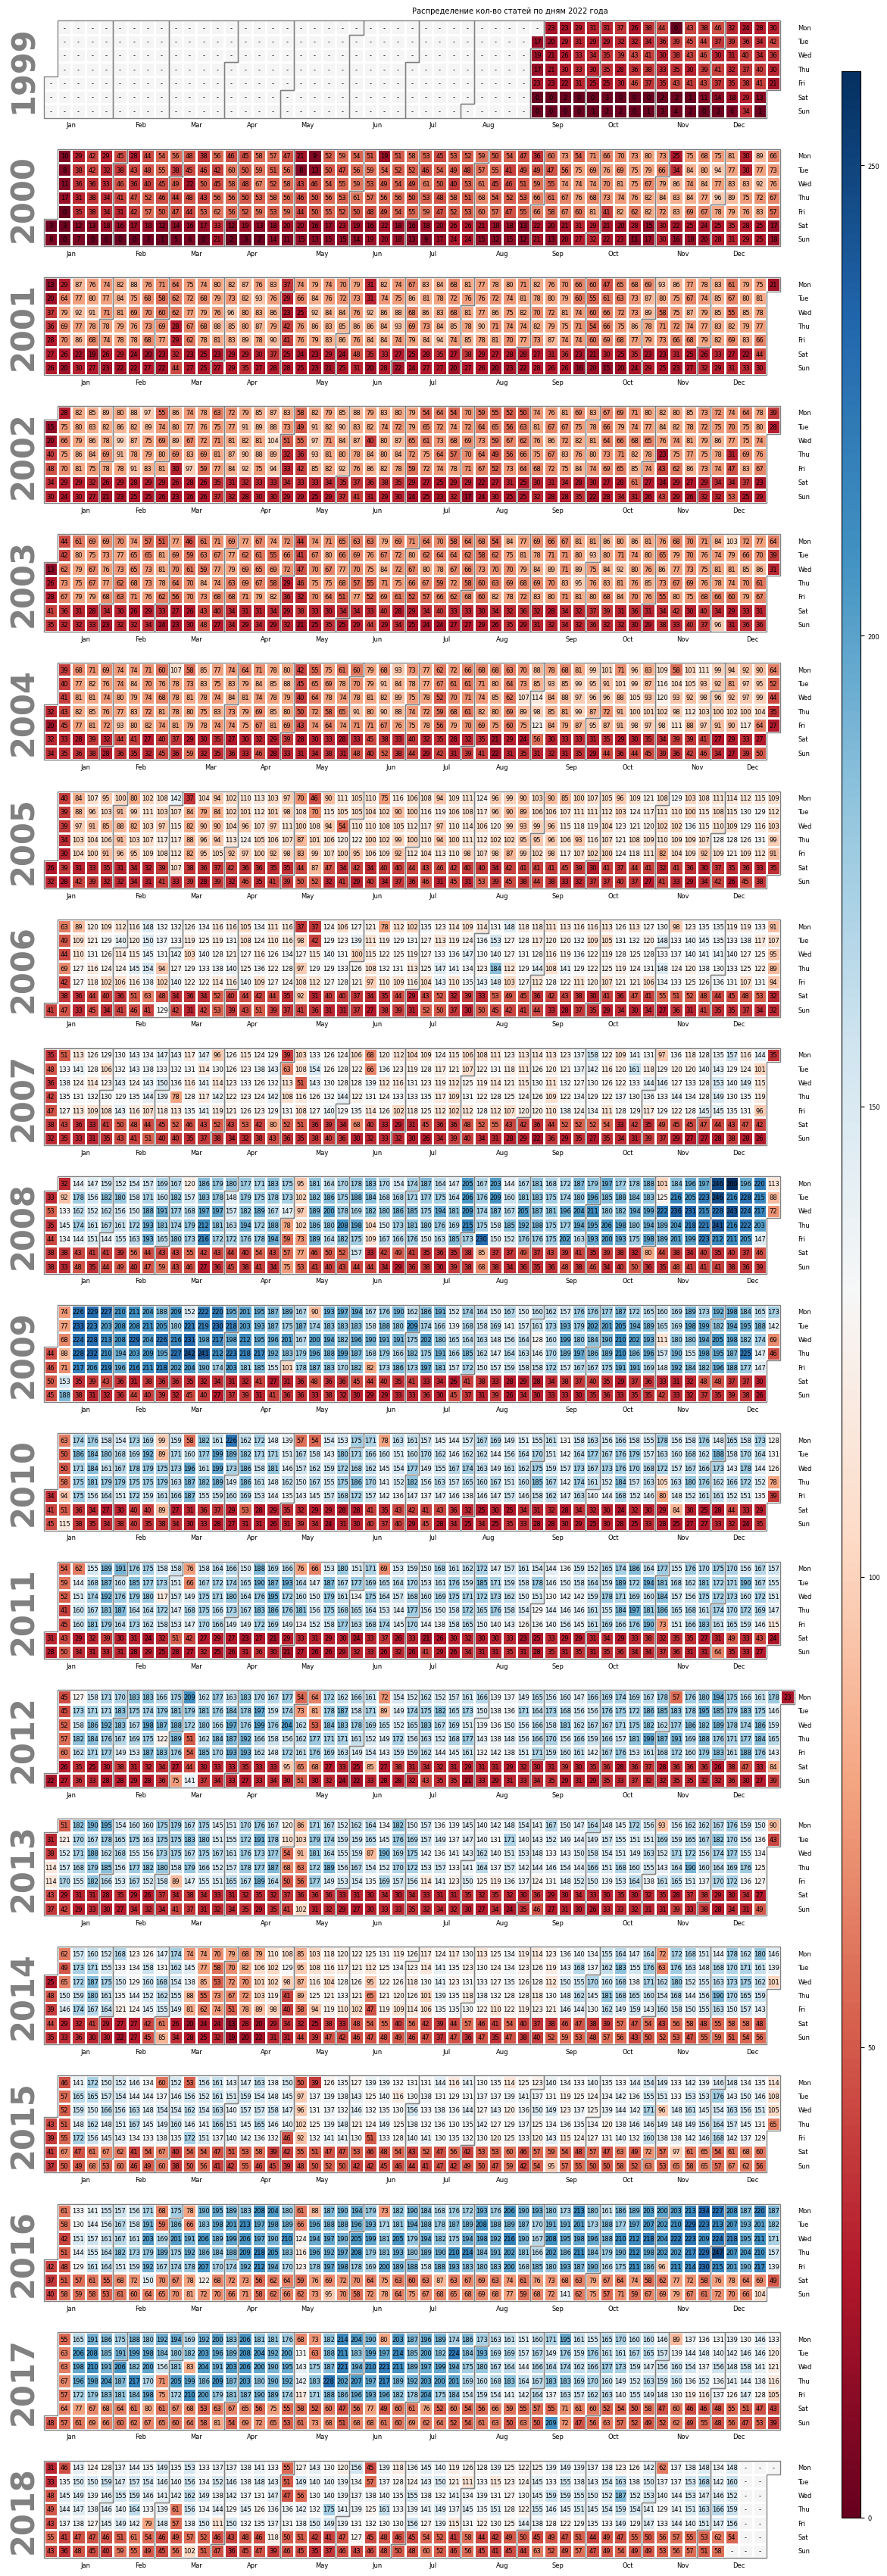

In [ ]:
import calplot
days = pd.date_range('1999-08-31', '2018-12-15')
values = pd.Series([data[i] if data.get(i) else 0 for i in days], index = days)
plt.rcParams.update({'font.size': 6})

# warnings.filterwarnings('ignore')
calplot.calplot(values,
                suptitle = 'Распределение кол-во статей по дням 2022 года',
                suptitle_kws = {'x': 0.5, 'y': 1.0}, cmap = 'RdBu',
                textformat = '{:.0f}', textfiller = '-', textcolor = 'black')

plt.show()

In [ ]:
df.sample(1 )

,title,text,topic,date,year
701115,Состоялись выборы «главного вора» России,"В Москве прошла самая крупная за последние годы сходка «воров в законе», на которой выбрали главного вора России. Об этом сообщает агентство «Росбалт». Мероприятие было организовано «законником» Михаилом Воеводиным (Михаил Лужнецкий) и прошло в одном из подконтрольных ему элитных ресторанов на территории Лужников. На нем присутствовали более десяти самых влиятельных мафиози. Новым «вором в законе №1» был избран Олег Шишканов, известный как Шишкан. Как отмечает агентство, необходимость выбрать нового главу мафии возникла после того, как Захария Калашова, известного в криминальных кругах как Шакро Молодой, приговорили к 9 годам и 10 месяцам лишения свободы в колонии строгого режима. Его признали виновным в вымогательстве, а также подтвердили главенствующую роль Шакро в криминальном мире России, которую он занял после смерти криминального авторитета Аслана Усояна (Дед Хасан) в 2013 году. До избрания Шишканова главным претендентом на «воровской трон» называли Тариэла Мулухова (Ониани), известного как Таро. Однако в августе стало известно, что его собираются пожизненно выслать из России. На данный момент он находится в колонии особого режима №6 «Черный дельфин» в Соль-Илецке.",Силовые структуры,2018-08-19,2018


# Предобработка данных

## Подготовка данных

In [7]:
stopwords_ru = stopwords.words("russian")
patterns = r'[^a-zA-Zа-яА-Я0-9ёЁ]'
morph = MorphAnalyzer()

In [8]:
df['text'] = df['text'].astype(str)
df['title'] = df['title'].astype(str)

In [9]:
from tqdm import tqdm
tqdm.pandas(desc='My bar!')
df['title'] = df['title'].progress_apply(lambda x:  ' '.join([i for i in re.sub(patterns, ' ', x.lower()).split() if i not in stopwords_ru]))

My bar!: 100%|██████████| 714935/714935 [00:18<00:00, 37981.35it/s]


In [10]:
from tqdm import tqdm
tqdm.pandas(desc='My bar!')
df['text'] = df['text'].progress_apply(lambda x:  ' '.join([i for i in re.sub(patterns, ' ', x.lower()).split() if i not in stopwords_ru]))

My bar!: 100%|██████████| 714935/714935 [06:14<00:00, 1907.35it/s]


In [11]:
df.to_csv('data_temp.csv', index=False)

In [12]:
df.sample(1)

,title,text,topic,date,year
391420,афинах грабитель вынес банка миллион евро,афинах мужчина беспрепятственно вынес банка миллион евро сообщает agence france presse инцидент произошел отделении одного крупнейших греческих банков alpha bank афинском международном аэропорту элефтериос венизелос воскресенье 2 октября грабитель сообщил является сотрудником охранной компании якобы пришел банк устранить ошибки системе обеспечения безопасности мужчина сообщается показал работникам банка соответствующее удостоверение впустили внутрь достал пистолет потребовал сотрудников банка сообщить комбинацию цифр открытия сейфа открыв мужчина распределил деньги трем сумкам скрылся такси полицейские вместе антитеррористическим отрядом отсматривают записи камер наблюдения аэропорту опознать преступника alpha bank основан 1879 году является вторым величине банком греции имеет 450 отделений всей стране отделения банка также лондоне балканах alpha bank стоит путать российским альфа банком примечательно альфа банку запретили регистрировать товарный знак alfa bank великобритании марка alpha запатентована греческим банком,Из жизни,2011/10/03,2011


In [13]:
title_set = []
for t in tqdm(df['title'].values, total=df['title'].values.shape[0]):
    title_set.extend(list(set(t.split())))
title_set = set(title_set)

100%|██████████| 714935/714935 [00:01<00:00, 418043.54it/s]


In [14]:
title_result = {s: morph.normal_forms(s)[0] for s in tqdm(title_set, total=len(title_set))}

100%|██████████| 199083/199083 [00:47<00:00, 4199.02it/s]


In [15]:
text_set = []
for ind, t in enumerate(tqdm(df['text'].values, total=df['text'].values.shape[0])):
    if ind%10000==0 and ind>0:
        text_set = list(set(text_set))
    text_set.extend(list(set(t.split())))
text_set = set(text_set)

100%|██████████| 714935/714935 [01:07<00:00, 10602.28it/s]


In [16]:
text_result = {s: morph.normal_forms(s)[0] for s in tqdm(text_set, total=len(text_set))}

100%|██████████| 1068907/1068907 [04:54<00:00, 3625.49it/s]


In [17]:
def lemmatize(doc):
    tokens = []
    for token in doc.split():
        if title_result.get(token):
            tokens.append(title_result.get(token))
    return tokens

In [18]:
from tqdm import tqdm
tqdm.pandas(desc='My bar!')
df['title'] = df['title'].progress_apply(lambda x: ' '.join(lemmatize(x)))

My bar!: 100%|██████████| 714935/714935 [00:06<00:00, 118384.43it/s]


In [19]:
def lemmatize(doc):
    tokens = []
    for token in doc.split():
        if text_result.get(token):
            tokens.append(text_result.get(token))
    return tokens

In [20]:
tqdm.pandas(desc='My bar!')
df['text'] = df['text'].progress_apply(lambda x: ' '.join(lemmatize(x)))

My bar!: 100%|██████████| 714935/714935 [01:24<00:00, 8493.89it/s]


In [21]:
df.to_csv('data_temp.csv', index=False)
df = pd.read_csv('data_temp.csv' )

In [ ]:
# df = pd.read_csv('/content/result.csv')

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=False)
for ind, ax in enumerate(axs):
    cn = Counter()
    for i in range(8):
        bs = 100_000
        cv = CountVectorizer(ngram_range=(ind + 1, ind + 1))
        n_grams = cv.fit_transform(df['title'].values[i * bs: (i + 1) * bs])
        data = dict(zip(cv.get_feature_names_out(), n_grams.sum(axis=0).tolist()[0]))
        cn += Counter(data)
    ngram_freq = pd.DataFrame(cn.most_common(10), columns=['n_grams','count']).sort_values('count', ascending=False)
    sns.barplot(x=ngram_freq['count'][:10], y=ngram_freq['n_grams'][:10], ax=ax)
fig.suptitle('Топ 10 1-2-3 грам для заголовка статьи', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for ind, ax in enumerate(axs):
    cn = Counter()
    for i in range(8):
        bs = 100_000
        cv = CountVectorizer(ngram_range=(ind + 1, ind + 1))
        n_grams = cv.fit_transform(df['text'].values[i * bs: (i + 1) * bs])
        data = dict(zip(cv.get_feature_names_out(), n_grams.sum(axis=0).tolist()[0]))
        cn += Counter(data)
    ngram_freq = pd.DataFrame(cn.most_common(10), columns=['n_grams', 'count']).sort_values('count', ascending=False)
    sns.barplot(x=ngram_freq['count'][:10], y=ngram_freq['n_grams'][:10], ax=ax)
fig.suptitle('Топ 10 1-2-3 грам для тела статьи', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
!pip install -U -q sklearn

In [ ]:
classes = df['topic'].unique()
def plot_n_gam(n_gram=1, col='title', title='Топ 10 слов по классам для заголовка статьи'):
    fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharey=False)
    axs = axs.flatten()
    for ind, cls in enumerate(classes):
        ax = axs[ind]
        cv = CountVectorizer(ngram_range=(n_gram, n_gram))
        n_grams = cv.fit_transform(df.loc[df['topic']==cls, col])
        data = {'count':n_grams.sum(axis=0).tolist()[0], 'n_grams': cv.get_feature_names_out()}
        ngram_freq = pd.DataFrame(data).sort_values('count', ascending=False)
        ax.set_title(cls)
        sns.barplot(x=ngram_freq['count'][:10], y=ngram_freq['n_grams'][:10], ax=ax)
    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_n_gam(n_gram=1, col='title', title='Топ 10 слов по классам для заголовка статьи')

In [ ]:
plot_n_gam(n_gram=2, col='title', title='Топ 10 биграм по классам для заголовка статьи')

In [ ]:
plot_n_gam(n_gram=3, col='title', title='Топ 10 тригам по классам для заголовка статьи')

In [ ]:
plot_n_gam(n_gram=1, col='text', title='Топ 10 тригам по классам для телу статьи')

In [ ]:
plot_n_gam(n_gram=2, col='text', title='Топ 10 тригам по классам для телу статьи')

In [ ]:
plot_n_gam(n_gram=3, col='text', title='Топ 10 тригам по классам для телу статьи')

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharey=False)
axs = axs.flatten()
for ind, cls in enumerate(classes):
    ax = axs[ind]
    cv = CountVectorizer(ngram_range=(3, 3))
    n_grams = cv.fit_transform(df.loc[df['topic']==cls, 'title'])
    data = {'count':n_grams.sum(axis=0).tolist()[0], 'n_grams': [i[0] for i in sorted(cv.vocabulary_.items(), key=lambda x: x[1])]}
    ngram_freq = pd.DataFrame(data).sort_values('count', ascending=False)
    ax.set_title(cls)
    sns.barplot(x=ngram_freq['count'][:10], y=ngram_freq['n_grams'][:10], ax=ax)
fig.suptitle('Топ 10 биграм по классам для заголовка статьи', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.loc[df['topic']==cls, 'title']

In [ ]:
# fig, axs = plt.subplots(1, 3, figsize=(12, 3))
# for ind, ax in enumerate(axs):
#     cv = CountVectorizer(ngram_range=(ind + 1, ind + 1))
#     n_grams = cv.fit_transform(df['text'])
#     data = {'count': n_grams.sum(axis=0).tolist()[0], 'n_grams': [i[0] for i in sorted(cv.vocabulary_.items(), key=lambda x: x[1])]}
#     ngram_freq = pd.DataFrame(data).sort_values('count', ascending=False)
#     sns.barplot(x=ngram_freq['count'][:10], y=ngram_freq['n_grams'][:10], ax=ax)
# fig.suptitle('Топ 10 1-2-3 грам для тела статьи', fontsize=20)

# plt.tight_layout()
# plt.show()

In [35]:
def plot_cm(y_true, y_pred, class_name):
    cm = confusion_matrix(y_true, y_pred, labels=list(range(len(class_name))), normalize='true' )
    tick_labels = class_name
    figsize = (8,8)
    ticks_size = 9
    fontsize_ax = 9
    fontsize_title = 12
    annotation_size = 8
    fig, ax = plt.subplots(figsize=figsize)
    plt.title('Confusion Matrix', fontsize=fontsize_title)
    hmap = sns.heatmap(
        cm,
        ax=ax,
        annot=True,
        square=True,
        fmt='.1%',
        cmap='GnBu',
        cbar=False,
        annot_kws={'size':str(annotation_size)},
        xticklabels=tick_labels,
        yticklabels=tick_labels
    )
    plt.ylabel('Actual', fontsize=fontsize_ax)
    plt.xlabel('Predicted', fontsize=fontsize_ax)
    hmap.set_xticklabels(hmap.get_xmajorticklabels(), fontsize=ticks_size, rotation=45)
    hmap.set_yticklabels(hmap.get_ymajorticklabels(), fontsize=ticks_size)
    plt.show()

In [ ]:
X, y = df[['title', 'text']], df['topic']
enc = {v: k for k, v in enumerate(y.unique())}
dec = {v: k for k, v in enc.items()}
y = y.replace(enc)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
enc_title = TfidfVectorizer(min_df=5, max_features=100, max_df=0.99, ).fit(X_train['title'])
enc_body = TfidfVectorizer(min_df=5, max_features=1000, max_df=0.99).fit(X_train['text'])
X_train_enc = hstack((enc_title.transform(X_train['title']), enc_body.transform(X_train['text'])))
X_test_enc = hstack((enc_title.transform(X_test['title']), enc_body.transform(X_test['text'])))

# Обучение и настройка моделей машинного обучения

## Random forest

In [ ]:
class_name = [dec[i] for i in range(len(dec.items()))]
rf = RandomForestClassifier( n_estimators=100, max_depth=8)
rf.fit(X_train_enc, y_train)
y_pred = rf.predict(X_test_enc)
print(classification_report(y_test, y_pred, target_names=class_name))

In [ ]:
plot_cm(y_test, y_pred, class_name)

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_enc, y_train)
y_pred = lr.predict(X_test_enc)
class_name = [dec[i] for i in range(len(dec.items()))]
print(classification_report(y_test, y_pred, target_names=class_name))

In [ ]:
plot_cm(y_test, y_pred, class_name)

## Удаляем спорные классы

In [22]:
df_new = df[(df['topic']!='Россия') & (df['topic']!='Мир')]

In [23]:
X, y = df_new[['title', 'text']], df_new['topic']
enc = {v: k for k, v in enumerate(y.unique())}
dec = {v: k for k, v in enc.items()}
y = y.replace(enc)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
enc_title = TfidfVectorizer(min_df=5, max_features=100, max_df=0.99).fit(X_train['title'])
enc_body = TfidfVectorizer(min_df=5, max_features=1000, max_df=0.99).fit(X_train['text'])

In [ ]:
X_train_enc = hstack((enc_title.transform(X_train['title']), enc_body.transform(X_train['text'])))
X_test_enc = hstack((enc_title.transform(X_test['title']), enc_body.transform(X_test['text'])))

## Random forest clear

In [ ]:
rf = RandomForestClassifier( n_estimators=100, max_depth=10)
rf.fit(X_train_enc, y_train)
y_pred = rf.predict(X_test_enc)
class_name = [dec[i] for i in range(9)]
print(classification_report(y_test, y_pred, target_names=class_name))

In [ ]:
plot_cm(y_test, y_pred, class_name)

## Logistic regression clear

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_enc, y_train)
y_pred = lr.predict(X_test_enc)
class_name = [dec[i] for i in range(9)]
print(classification_report(y_test, y_pred, target_names=class_name))

In [ ]:
plot_cm(y_test, y_pred, class_name)

## Один кодировщик

In [25]:
enc_full = TfidfVectorizer(min_df=5, max_features=1100, max_df=0.99, ).fit(X_train['title'] + ' ' + X_train['text'])
X_train_enc = enc_full.transform(X_train['title'] + ' ' + X_train['text'])
X_test_enc = enc_full.transform(X_test['title'] + ' ' + X_test['text'])

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_enc, y_train)
y_pred = lr.predict(X_test_enc)
class_name = [dec[i] for i in range(9)]
print(classification_report(y_test, y_pred, target_names=class_name))

In [ ]:
plot_cm(y_test, y_pred, class_name)

In [ ]:
params = {'C': np.linspace(0, 2, 5)}
gscv = GridSearchCV(LogisticRegression(random_state=42), params, cv=5, scoring='accuracy')
gscv.fit(X_train_enc, y_train)
print(round(gscv.best_score_, 4))

In [ ]:
y_pred = gscv.best_estimator_.predict(X_test_enc)
class_name = [dec[i] for i in range(9)]
print(classification_report(y_test, y_pred, target_names=class_name))

In [ ]:
plot_cm(y_test, y_pred, class_name)

In [ ]:
!mkdir bin
stopwords_ru = stopwords.words("russian")
with open('bin/lr.pkl', 'wb') as f:
    joblib.dump(lr, f)
with open('bin/sw.pkl', 'wb') as f:
    joblib.dump(stopwords_ru, f)
with open('bin/enc_full.pkl', 'wb') as f:
    joblib.dump(enc_full, f)
with open('bin/dec.pkl', 'wb') as f:
    joblib.dump(dec, f)

In [ ]:
with open('bin/lr.pkl', 'rb') as f:
    lr = joblib.load(f)
with open('bin/sw.pkl', 'rb') as f:
    stopwords_ru=joblib.load(f)
with open('bin/enc_full.pkl', 'rb') as f:
    enc_full = joblib.load(f)
with open('bin/dec.pkl', 'rb') as f:
    dec = joblib.load(f)

In [ ]:
!zip -r bin.zip bin

In [ ]:
!zip result_data.zip /content/data_temp.csv

# DL

1.**Предобработка данных:** объединяем заголовки и основной текст статьи для токенизации с использованием BERT.

2.**Кастомная модель:** используем предварительно обученный BERT для извлечения эмбеддингов и добавляем несколько полносвязных слоев с dropout и batch normalization для улучшения производительности.

3.**Scheduler:** используем линейный scheduler с warmup для адаптивного изменения learning rate, что помогает избежать проблем с переобучением и нестабильностью обучения.

## Двухслойная нейросеть над TF-IDF

In [26]:
from torch.utils.data import Dataset, DataLoader
import torch

# Создание датасета
class NewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {'input': torch.tensor(self.encodings[idx].toarray(), dtype=torch.float),
                'labels': torch.tensor(self.labels.values[idx], dtype=torch.long)}
        return item


train_dataset = NewsDataset(X_train_enc, y_train)
val_dataset = NewsDataset(X_test_enc, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [27]:


if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
print(device)

cuda:0


In [28]:
# Функция обучения
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler=None):
    model.train()
    losses = []
    correct_predictions = 0



    for d in tqdm(data_loader, desc="Training", leave=False):
        inp = d['input'].to(device, dtype=torch.float).squeeze(1).to(device)
        labels = d['labels'].to(device, dtype=torch.long).to(device)
        with torch.autocast(device_type="cuda"):
            outputs = model(inp)
            loss = loss_fn(outputs, labels)
            preds = outputs.argmax(dim=1)
            correct_predictions += torch.sum(preds == labels).float()
            losses.append(loss.item())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            if scheduler:
                scheduler.step()

    return correct_predictions.float() / len(data_loader.dataset), np.mean(losses)

# Функция оценки
def eval_model(model, data_loader, loss_fn, device):
    model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in tqdm(data_loader, desc="Evaluating", leave=False):
            inp = d['input'].to(device, dtype=torch.float).squeeze(1).to(device)
            labels = d['labels'].to(device, dtype=torch.long).to(device)

            outputs = model(inp)

            preds = outputs.argmax(dim=1)
            loss = loss_fn(outputs, labels)

            correct_predictions += torch.sum(preds == labels).float()
            losses.append(loss.item())

    return correct_predictions.float() / len(data_loader.dataset), np.mean(losses)

In [29]:
import random
import os

def set_seed(seed):
    np.random.seed(seed)
    random_state = np.random.RandomState(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)
    return random_state

In [30]:
class NewsClassifier(torch.nn.Module):
    def __init__(self, n_classes):
        super(NewsClassifier, self).__init__()
        self.fc1 = torch.nn.Linear(1100, 256)
        self.fc2 = torch.nn.Linear(256, n_classes)
        self.noise = 0.01

    def forward(self, x):
        if self.training:
            x = x + torch.distributions.uniform.Uniform(-self.noise , self.noise , ).sample(x.size()).to(device)
        x = self.fc1(x )
        x = torch.relu(x)
        if self.training:
            x = x + torch.distributions.uniform.Uniform(-self.noise , self.noise , ).sample(x.size()).to(device)
        x = self.fc2(x)
        return x

In [ ]:
# Обучение модели
from collections import defaultdict
set_seed(43)

model = NewsClassifier(y_train.nunique()).to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss().to(device)

scheduler = None # torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[4,7], gamma=0.3)

history = defaultdict(list)
best_accuracy = 0
num_epochs = 10

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device, scheduler)
    print(f'Train loss {train_loss} accuracy {train_acc}')
    history['train_loss'].append(train_loss)

    val_acc, val_loss = eval_model(model, val_loader, loss_fn, device)
    print(f'Val loss {val_loss} accuracy {val_acc}')
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.pt')
        best_accuracy = val_acc
model.load_state_dict(torch.load('best_model_state.pt'))

Epoch 1/10
----------


Train loss 0.3973586566327599 accuracy 0.8668673038482666


Val loss 0.33224301289476077 accuracy 0.8844989538192749
Epoch 2/10
----------


Train loss 0.30899970709202085 accuracy 0.8924163579940796


Val loss 0.30856428920415446 accuracy 0.8919772505760193
Epoch 3/10
----------


Train loss 0.26670591897778967 accuracy 0.9065115451812744


Val loss 0.295802291598924 accuracy 0.8982470631599426
Epoch 4/10
----------


Train loss 0.23057023687681305 accuracy 0.9195238947868347


Val loss 0.2903490059807252 accuracy 0.9006999731063843
Epoch 5/10
----------


Train loss 0.19772636289023218 accuracy 0.9315072298049927


Val loss 0.29577125908356233 accuracy 0.8996589779853821
Epoch 6/10
----------


Train loss 0.16727111987895124 accuracy 0.9421862959861755


Val loss 0.3064133787383632 accuracy 0.8986658453941345
Epoch 7/10
----------


Train loss 0.14049848626730846 accuracy 0.9518932104110718


Val loss 0.32128538742838325 accuracy 0.8969069719314575
Epoch 8/10
----------


Train loss 0.11707621133345866 accuracy 0.9602271318435669


Val loss 0.34258901382864926 accuracy 0.8953873515129089
Epoch 9/10
----------


Train loss 0.09837547029264768 accuracy 0.966652512550354


Val loss 0.36320492535117144 accuracy 0.8939754366874695
Epoch 10/10
----------


Train loss 0.08281991770931169 accuracy 0.9720458984375


Val loss 0.39125368389808024 accuracy 0.8931738138198853


<All keys matched successfully>

In [33]:
def predict(model, data_loader, device):
    model.eval()
    losses = []
    correct_predictions = 0
    predicts = []
    with torch.no_grad():
        for d in tqdm(data_loader, desc="predicting", leave=False):
            inp = d['input'].to(device, dtype=torch.float).squeeze(1).to(device)
            outputs = model(inp)
            predicts.extend(outputs.argmax(dim=1).cpu().numpy().tolist())
    return predicts

In [ ]:
class_name = [dec[i] for i in range(len(dec.items()))]
y_pred = predict(model, val_loader, device)

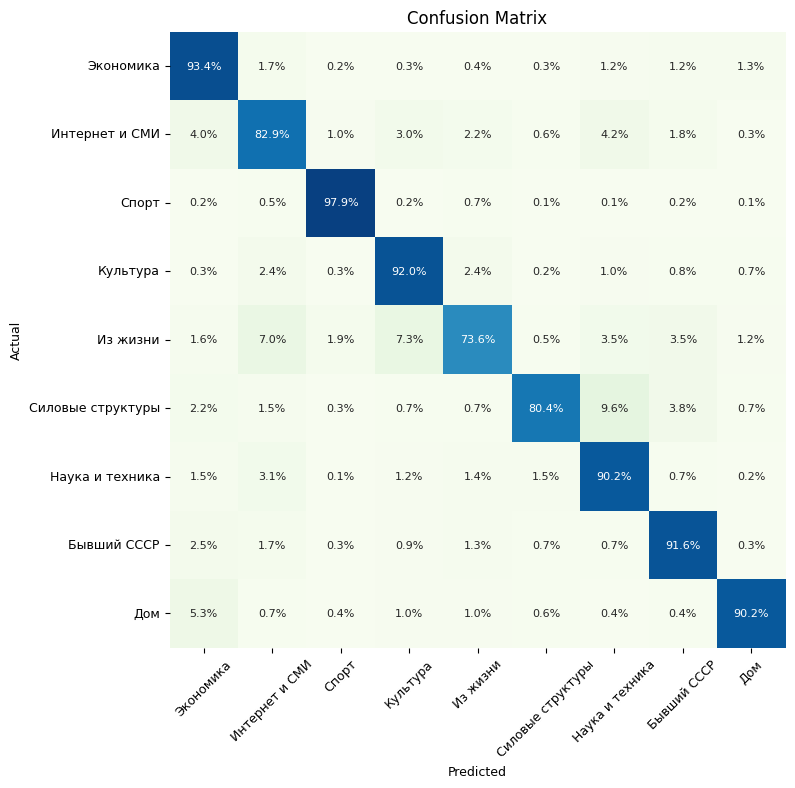

In [36]:
plot_cm(y_test, y_pred, class_name)

In [37]:
print(classification_report(y_test, y_pred, target_names=class_name))

                   precision    recall  f1-score   support

        Экономика       0.92      0.93      0.93     15906
   Интернет и СМИ       0.82      0.83      0.83      8933
            Спорт       0.97      0.98      0.98     12883
         Культура       0.90      0.92      0.91     10759
         Из жизни       0.81      0.74      0.77      5521
Силовые структуры       0.88      0.80      0.84      3919
  Наука и техника       0.88      0.90      0.89     10627
      Бывший СССР       0.92      0.92      0.92     10680
              Дом       0.89      0.90      0.90      4347

         accuracy                           0.90     83575
        macro avg       0.89      0.88      0.88     83575
     weighted avg       0.90      0.90      0.90     83575



## Трансформер

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df = pd.read_csv('final_dataset.csv' )
df=df[df.text.notna()]
df=df[df.title.notna()]
df = df[(df['topic']!='Россия') & (df['topic']!='Мир')]
df['text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
X, y = df['text'], df['topic']
enc = {v: k for k, v in enumerate(y.unique())}
dec = {v: k for k, v in enc.items()}
df['label'] = y.replace(enc)

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [ ]:
import torch
from transformers import AutoTokenizer
from tqdm import tqdm

# Инициализация токенизатора
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:


# Токенизация текстов
def batch_tokenize(texts, tokenizer, max_length=128):
    all_encodings = {
        'input_ids': [],
        'attention_mask': []
    }

    # Проверка данных перед токенизацией
    for i, text in enumerate(texts):
        if not isinstance(text, str):
            raise ValueError(f"Input at index {i} is not a string: {text}")

    for i in tqdm(range(0, len(texts), 32)):  # Используем шаг 32 для обработки данных пакетами
        batch = texts[i:i+32]
        encodings = tokenizer.batch_encode_plus(
            batch,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        all_encodings['input_ids'].append(encodings['input_ids'])
        all_encodings['attention_mask'].append(encodings['attention_mask'])

    # Преобразуем списки в тензоры
    all_encodings['input_ids'] = torch.cat(all_encodings['input_ids'], dim=0)
    all_encodings['attention_mask'] = torch.cat(all_encodings['attention_mask'], dim=0)
    return all_encodings

# Токенизация текстов с прогресс-баром
train_encodings = batch_tokenize(train_df['text'].tolist(), tokenizer)
val_encodings = batch_tokenize(val_df['text'].tolist(), tokenizer)

# Проверяем, что форма данных правильная
print(f"Train input_ids shape: {train_encodings['input_ids'].shape}")
print(f"Train attention_mask shape: {train_encodings['attention_mask'].shape}")
print(f"Val input_ids shape: {val_encodings['input_ids'].shape}")
print(f"Val attention_mask shape: {val_encodings['attention_mask'].shape}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

100%|██████████| 2612/2612 [04:29<00:00,  9.68it/s]


Train input_ids shape: torch.Size([334298, 128])
Train attention_mask shape: torch.Size([334298, 128])
Val input_ids shape: torch.Size([83575, 128])
Val attention_mask shape: torch.Size([83575, 128])


In [ ]:
from transformers import AutoModelForSequenceClassification

In [ ]:
from torch.utils.data import Dataset, DataLoader


# Создание датасета
class NewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx], dtype=torch.long) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

# Преобразование данных для использования в DataLoader
train_labels = train_df['label'].tolist()
val_labels = val_df['label'].tolist()

train_dataset = NewsDataset(train_encodings, train_labels)
val_dataset = NewsDataset(val_encodings, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# Функция обучения
def train_epoch(model, data_loader, loss_fn, optimizer, device, ):
    model.train()
    losses = []
    correct_predictions = 0

    for d in tqdm(data_loader, desc="Training"):
        input_ids = d['input_ids'].to(device, dtype=torch.long)
        attention_mask = d['attention_mask'].to(device, dtype=torch.long)
        labels = d['labels'].to(device, dtype=torch.long)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask).logits
        # _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, labels)
        preds = outputs.argmax(dim=1)

        correct_predictions += torch.sum(preds == labels).float()
        losses.append(loss.item())

        loss.backward()
        # nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()
        # scheduler.step()

    return correct_predictions.float() / len(data_loader.dataset), np.mean(losses)

# Функция оценки
def eval_model(model, data_loader, loss_fn, device):
    model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in tqdm(data_loader, desc="Evaluating"):
            input_ids = d['input_ids'].to(device, dtype=torch.long)
            attention_mask = d['attention_mask'].to(device, dtype=torch.long)
            labels = d['labels'].to(device, dtype=torch.long)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask).logits

            preds = outputs.argmax(dim=1)
            # _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, labels)

            correct_predictions += torch.sum(preds == labels).float()
            losses.append(loss.item())

    return correct_predictions.float() / len(data_loader.dataset), np.mean(losses)

In [ ]:
# Инициализация
num_classes = df['label'].nunique()
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)
for param in model.bert.parameters():
    param.requires_grad = False
# NewsClassifier(n_classes=num_classes)
model = model.to(device)

optimizer = torch.optim.Adam(model.classifier.parameters(), lr=1e-4)
loss_fn = torch.nn.CrossEntropyLoss().to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Обучение модели
from collections import defaultdict


history = defaultdict(list)
best_accuracy = 0
num_epochs = 2

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
    print(f'Train loss {train_loss} accuracy {train_acc}')
    history['train_loss'].append(train_loss)

    val_acc, val_loss = eval_model(model, val_loader, loss_fn, device)
    print(f'Val loss {val_loss} accuracy {val_acc}')
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc


Epoch 1/2
----------


Training:   0%|          | 0/41788 [00:00<?, ?it/s]/var/folders/x9/bzmn7vsd2gxdb3hty0m796s00000gn/T/ipykernel_6146/1252671511.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx], dtype=torch.long) for key, val in self.encodings.items()}
Training: 100%|██████████| 41788/41788 [52:08<00:00, 13.36it/s]    


Train loss 2.092178113097447 accuracy 0.20324918627738953


Evaluating: 100%|██████████| 10447/10447 [10:20<00:00, 16.83it/s]


Val loss 2.0081696113445116 accuracy 0.2940831482410431
Epoch 2/2
----------


Training: 100%|██████████| 41788/41788 [49:12<00:00, 14.15it/s] 


Train loss 2.0451971490502734 accuracy 0.22952207922935486


Evaluating: 100%|██████████| 10447/10447 [10:06<00:00, 17.24it/s]


Val loss 1.9877993953596567 accuracy 0.3106909990310669


In [ ]:


for epoch in range(3, 6):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
    print(f'Train loss {train_loss} accuracy {train_acc}')
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)

    val_acc, val_loss = eval_model(model, val_loader, loss_fn, device)
    print(f'Val loss {val_loss} accuracy {val_acc}')
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 4/2
----------


Training:   0%|          | 0/41788 [00:00<?, ?it/s]/var/folders/x9/bzmn7vsd2gxdb3hty0m796s00000gn/T/ipykernel_6146/1252671511.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx], dtype=torch.long) for key, val in self.encodings.items()}
Training: 100%|██████████| 41788/41788 [3:30:01<00:00,  3.32it/s]    


Train loss 2.0309278712245713 accuracy 0.23869051039218903


Evaluating: 100%|██████████| 10447/10447 [32:04<00:00,  5.43it/s]   


Val loss 1.9745574032072475 accuracy 0.3153335452079773
Epoch 5/2
----------


Training: 100%|██████████| 41788/41788 [49:22<00:00, 14.11it/s] 


Train loss 2.023926841496075 accuracy 0.24293820559978485


Evaluating: 100%|██████████| 10447/10447 [10:36<00:00, 16.42it/s]


Val loss 1.970365423340084 accuracy 0.3129763603210449
Epoch 6/2
----------


Training: 100%|██████████| 41788/41788 [49:25<00:00, 14.09it/s] 


Train loss 2.0201394440934477 accuracy 0.2430877685546875


Evaluating: 100%|██████████| 10447/10447 [10:05<00:00, 17.27it/s]


Val loss 1.957810236961063 accuracy 0.32270416617393494


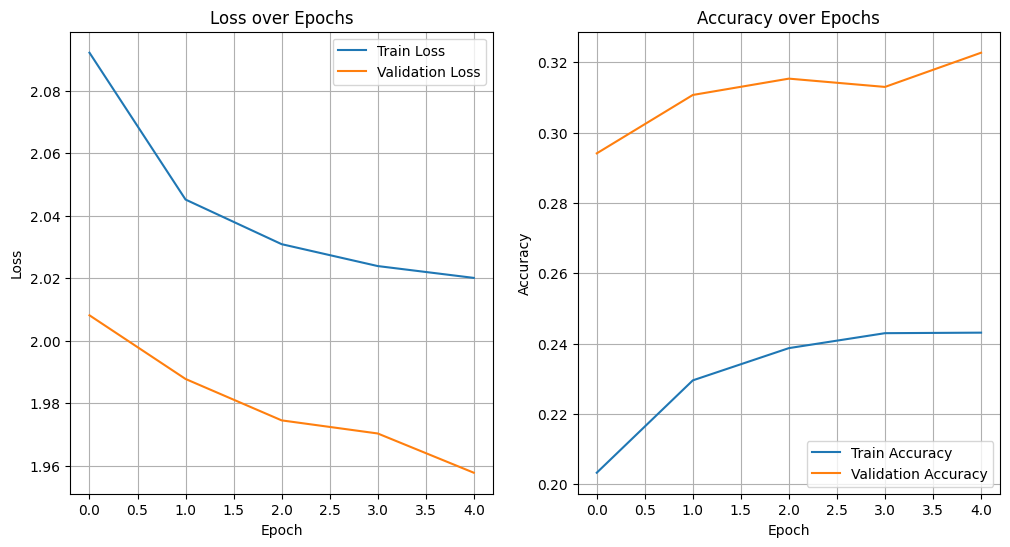

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Построение графиков
plt.plot(history['train_loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
tqdm.pandas()

lens = df.sample(50_000).text.progress_apply(lambda x: len(tokenizer.encode(x)))

100%|██████████| 50000/50000 [04:55<00:00, 169.16it/s]


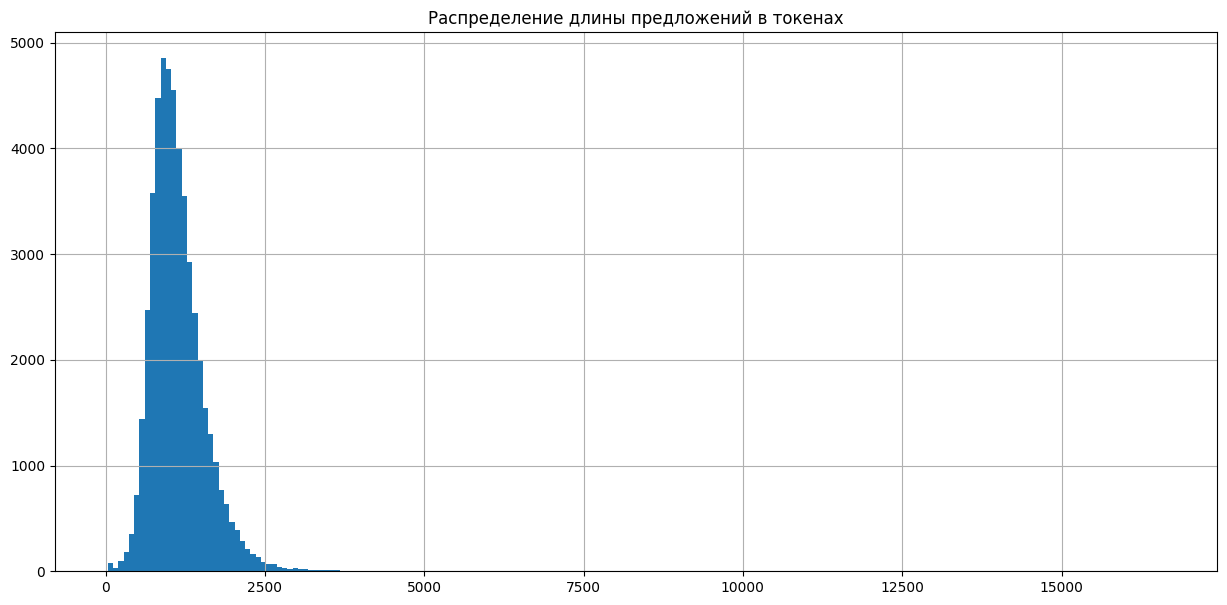

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(lens, bins=200)
plt.title('Распределение длины предложений в токенах')
plt.grid()
plt.show()

## LSTM

In [ ]:
!pip install spacy
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 159.5 kB/s eta 0:00:00a 0:00:01
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 422.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 629.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 kB 939.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.0/409.0 kB 418.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 691.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.4/486.4 kB 684.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.5/760.5 kB 672.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 279.3 k

In [ ]:
import time
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import spacy
import fasttext
import fasttext.util
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

# Загрузка данных и предобработка
data = pd.read_csv('data/final_dataset.csv')

df = data.copy()
df = df[(df['topic'] != 'Россия') & (df['topic'] != 'Мир')]
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['topic'])
df['text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df.reset_index(inplace=True)
df = df.drop(columns=['date', 'title', 'index'])

display(df.head(2))

# Определение устройства
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
print(device)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


,text,topic,label
0,Телеканалы станут вещать по единому тарифу С 1...,Экономика,8
1,"Volkswagen выкупает остатки акций ""Шкоды"" Герм...",Экономика,8


mps


In [ ]:
# Функция для уменьшения размеров DataFrame
def reduce_dataframe(df, num_elements):
    return df.sample(n=num_elements, random_state=42).reset_index(drop=True)

# Уменьшение размеров train_df и test_df
train_df = reduce_dataframe(train_df, num_elements=1000)  # Укажите нужное количество элементов
test_df = reduce_dataframe(test_df, num_elements=200)

# Загрузка модели spacy для русского языка
nlp = spacy.load("ru_core_news_sm")
print('Загрузка токенизатора завершена')

# Загрузка предобученных векторов FastText для русского языка
# fasttext.util.download_model('ru', if_exists='ignore')  # скачивание модели, если её еще нет
ft = fasttext.load_model('data/cc.ru.300.bin')
print('Загрузка предобученных векторов FastText для русского языка завершена')

def tokenize_and_transform(text):
    tokens = [token.text for token in nlp(text)]
    vectors = [torch.tensor(ft.get_word_vector(token)) for token in tokens]
    return torch.stack(vectors)

# Преобразование текстов и меток в тензоры с отображением прогресса
def process_data(dataframe):
    texts = []
    labels = []
    for text, label in tqdm(zip(dataframe['text'], dataframe['label']), total=len(dataframe), desc="Embedding Texts"):
        texts.append(tokenize_and_transform(text))
        labels.append(label)
    labels = torch.tensor(labels, dtype=torch.long)  # Используем dtype=torch.long для целочисленных меток
    return texts, labels

train_texts, train_labels = process_data(train_df)
test_texts, test_labels = process_data(test_df)

Загрузка токенизатора завершена
Загрузка предобученных векторов FastText для русского языка завершена


Embedding Texts: 100%|██████████| 200/200 [00:10<00:00, 19.42it/s]


In [ ]:
# Создание DataLoader'ов
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

def collate_fn(batch):
    texts, labels = zip(*batch)
    lengths = [len(text) for text in texts]
    padded_texts = torch.nn.utils.rnn.pad_sequence(texts, batch_first=True)
    return padded_texts, torch.tensor(lengths), torch.tensor(labels, dtype=torch.long)  # Обеспечиваем целочисленные метки

train_dataset = TextDataset(train_texts, train_labels)
test_dataset = TextDataset(test_texts, test_labels)

BATCH_SIZE = 64
train_iterator = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_iterator = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn)

# Определение модели
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()

        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers,
                            bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):
        packed_embedded = nn.utils.rnn.pack_padded_sequence(text, text_lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)

        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

        return self.fc(hidden)  # Возвращаем логиты для каждого класса

# Функция для расчета точности (корректируем для многоклассовой классификации)
def accuracy(preds, y):
    _, preds_max = torch.max(preds, 1)
    correct = (preds_max == y).float()
    return correct.sum() / len(correct)

# Функция тренировки модели
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()

    for batch in tqdm(iterator, desc='Training', leave=False):
        optimizer.zero_grad()
        text, text_lengths, label = batch
        text = text.to(device)
        label = label.to(device)
        predictions = model(text, text_lengths)
        loss = criterion(predictions, label)
        acc = accuracy(predictions, label)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Функция оценки модели
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()

    with torch.no_grad():
        for batch in tqdm(iterator, desc='Evaluating', leave=False):
            text, text_lengths, label = batch
            text = text.to(device)
            label = label.to(device)
            predictions = model(text, text_lengths)
            loss = criterion(predictions, label)
            acc = accuracy(predictions, label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Epoch: 01, Train Loss: 1.513, Train Acc: 46.26%, Val. Loss: 1.012, Val. Acc: 66.46%, Elapsed Time: 959.34s, ETA: 10552.72s


Epoch: 02, Train Loss: 1.080, Train Acc: 64.38%, Val. Loss: 1.151, Val. Acc: 62.01%, Elapsed Time: 1908.38s, ETA: 9541.89s


Epoch: 03, Train Loss: 0.884, Train Acc: 70.59%, Val. Loss: 0.793, Val. Acc: 73.29%, Elapsed Time: 2861.56s, ETA: 8584.68s


Epoch: 04, Train Loss: 0.746, Train Acc: 74.99%, Val. Loss: 0.691, Val. Acc: 77.34%, Elapsed Time: 3867.95s, ETA: 7735.90s


Epoch: 05, Train Loss: 0.793, Train Acc: 73.96%, Val. Loss: 0.753, Val. Acc: 75.29%, Elapsed Time: 5084.17s, ETA: 7117.84s


Epoch: 06, Train Loss: 0.641, Train Acc: 78.64%, Val. Loss: 0.656, Val. Acc: 77.73%, Elapsed Time: 6862.45s, ETA: 6862.45s


Epoch: 07, Train Loss: 0.564, Train Acc: 81.25%, Val. Loss: 0.592, Val. Acc: 80.32%, Elapsed Time: 7904.27s, ETA: 5645.91s


Epoch: 08, Train Loss: 0.496, Train Acc: 83.52%, Val. Loss: 0.596, Val. Acc: 79.25%, Elapsed Time: 8969.39s, ETA: 4484.69s


Epoch: 09, Train Loss: 0.470, Train Acc: 84.29%, Val. Loss: 0.530, Val. Acc: 81.98%, Elapsed Time: 10022.37s, ETA: 3340.79s


Epoch: 10, Train Loss: 0.437, Train Acc: 85.45%, Val. Loss: 0.571, Val. Acc: 81.49%, Elapsed Time: 11106.17s, ETA: 2221.23s


Epoch: 11, Train Loss: 0.415, Train Acc: 85.93%, Val. Loss: 0.489, Val. Acc: 84.03%, Elapsed Time: 12177.12s, ETA: 1107.01s


Epoch: 12, Train Loss: 0.399, Train Acc: 86.46%, Val. Loss: 0.480, Val. Acc: 84.47%, Elapsed Time: 13257.37s, ETA: 0.00s


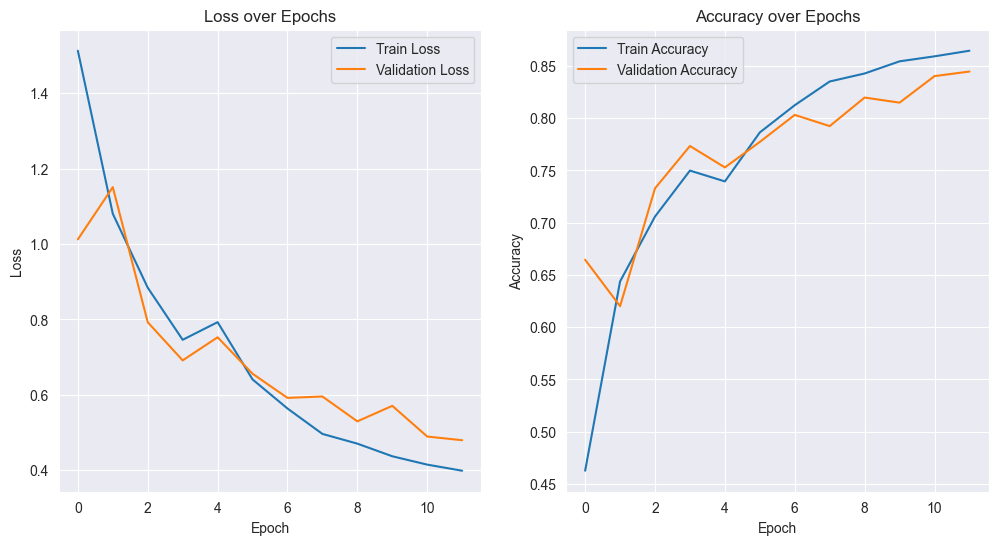

In [ ]:
# Гиперпараметры
NUM_CLASSES = len(label_encoder.classes_)  # Количество классов
EMBEDDING_DIM = 300  # Размерность векторов FastText
HIDDEN_DIM = 256
OUTPUT_DIM = NUM_CLASSES  # Количество классов
N_LAYERS = 3
BIDIRECTIONAL = True
DROPOUT = 0.3

# Инициализация модели
model = LSTMClassifier(EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)
model = model.to(device)

# Настройка начального learning rate
initial_lr = 0.001

# Определение оптимизатора и функции потерь
optimizer = optim.Adam(model.parameters(), lr=initial_lr)
criterion = nn.CrossEntropyLoss()  # Используем CrossEntropyLoss для целочисленных меток
criterion = criterion.to(device)

# Определение функции для изменения скорости обучения
def lr_lambda(epoch):
    return 1 / max(1, epoch - 10)  # Уменьшаем lr в 10 раз на последней эпохе

# Создание lr_scheduler
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

# Обучение модели
N_EPOCHS = 12

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

start_time = time.time()

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    val_loss, val_acc = evaluate(model, test_iterator, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    elapsed_time = time.time() - start_time
    avg_epoch_time = elapsed_time / (epoch + 1)
    remaining_time = avg_epoch_time * (N_EPOCHS - epoch - 1)

    print(f'Epoch: {epoch+1:02}, '
          f'Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, '
          f'Val. Loss: {val_loss:.3f}, Val. Acc: {val_acc*100:.2f}%, '
          f'Elapsed Time: {elapsed_time:.2f}s, '
          f'ETA: {remaining_time:.2f}s')
    # Сохранение модели
    torch.save(model.state_dict(), f'lstm_model{epoch + 1}.pth')

    # Обновление lr в конце каждой эпохи
    scheduler.step()

# Сохранение модели
torch.save(model.state_dict(), 'lstm_model.pth')

# Визуализация истории обучения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

In [ ]:
# Функция для уменьшения размеров DataFrame
def reduce_dataframe(df, num_elements):
    return df.sample(n=num_elements, random_state=42).reset_index(drop=True)

# Уменьшение размеров train_df и test_df
train_df = reduce_dataframe(train_df, num_elements=10000)  # Укажите нужное количество элементов
test_df = reduce_dataframe(test_df, num_elements=2000)

# Загрузка модели spacy для русского языка
nlp = spacy.load("ru_core_news_sm")
print('Загрузка токенизатора завершена')

# Загрузка предобученных векторов FastText для русского языка
# fasttext.util.download_model('ru', if_exists='ignore')  # скачивание модели, если её еще нет
ft = fasttext.load_model('data/cc.ru.300.bin')
print('Загрузка предобученных векторов FastText для русского языка завершена')

def tokenize_and_transform(text):
    tokens = [token.text for token in nlp(text)]
    vectors = [torch.tensor(ft.get_word_vector(token)) for token in tokens]
    return torch.stack(vectors)

# Преобразование текстов и меток в тензоры с отображением прогресса
def process_data(dataframe):
    texts = []
    labels = []
    for text, label in tqdm(zip(dataframe['text'], dataframe['label']), total=len(dataframe), desc="Embedding Texts"):
        texts.append(tokenize_and_transform(text))
        labels.append(label)
    labels = torch.tensor(labels, dtype=torch.long)  # Используем dtype=torch.long для целочисленных меток
    return texts, labels

train_texts, train_labels = process_data(train_df)
test_texts, test_labels = process_data(test_df)

Загрузка токенизатора завершена
Загрузка предобученных векторов FastText для русского языка завершена


Embedding Texts: 100%|██████████| 2000/2000 [01:45<00:00, 18.97it/s]


In [ ]:
# Гиперпараметры
NUM_CLASSES = len(label_encoder.classes_)  # Количество классов
EMBEDDING_DIM = 300  # Размерность векторов FastText
HIDDEN_DIM = 256
OUTPUT_DIM = NUM_CLASSES  # Количество классов
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5

# Инициализация модели
model = LSTMClassifier(EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)
model = model.to(device)

# Определение оптимизатора и функции потерь
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()  # Используем CrossEntropyLoss для целочисленных меток
criterion = criterion.to(device)


# Обучение модели
N_EPOCHS = 10

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

start_time = time.time()

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    val_loss, val_acc = evaluate(model, test_iterator, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    elapsed_time = time.time() - start_time
    avg_epoch_time = elapsed_time / (epoch + 1)
    remaining_time = avg_epoch_time * (N_EPOCHS - epoch - 1)

    print(f'Epoch: {epoch+1:02}, '
          f'Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, '
          f'Val. Loss: {val_loss:.3f}, Val. Acc: {val_acc*100:.2f}%, '
          f'Elapsed Time: {elapsed_time:.2f}s, '
          f'ETA: {remaining_time:.2f}s')

# Сохранение модели
torch.save(model.state_dict(), 'lstm_model.pth')

# Визуализация истории обучения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

# Работа с telegram-bot'ом

## Загрузка моделей и данных

In [ ]:
!pip install -q -U scikit-learn
!pip install -q -U aiogram
!pip install -q typing-extensions==4.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.8/510.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is

In [ ]:
!pip install -q -U wldhx.yadisk-direct nltk pandarallel pymorphy2 pandas
!curl -L $(yadisk-direct https://disk.yandex.ru/d/Ihh18yf4807QPA) -o data.zip
!unzip data.zip

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 53.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 13.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.18.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
import joblib
from collections import Counter

nltk.download('stopwords')
from pandarallel import pandarallel
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
pd.set_option('max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from scipy.sparse import hstack
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!git clone https://github.com/konstantinator/hse_project.git
with open('hse_project/bin/lr.pkl', 'rb') as f:
    lr = joblib.load(f)
with open('hse_project/bin/sw.pkl', 'rb') as f:
    stopwords_ru=joblib.load(f)
with open('hse_project/bin/enc_full.pkl', 'rb') as f:
    enc_full = joblib.load(f)
with open('hse_project/bin/dec.pkl', 'rb') as f:
    dec = joblib.load(f)

Cloning into 'hse_project'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 52 (delta 7), reused 31 (delta 4), pack-reused 0
Receiving objects: 100% (52/52), 6.87 MiB | 16.02 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
df_source = pd.read_csv('final_dataset.csv' )
df_source_new = df_source[(df_source['topic']!='Россия') & (df_source['topic']!='Мир')]

In [ ]:
res = []
for topic in df_source_new['topic'].unique():
    res.append(df_source_new[df_source_new['topic']==topic].sample(100))

In [ ]:
df_base = pd.concat(res)
df_base = df_base.reset_index(drop=True)

In [ ]:
vectors = enc_full.transform(df_base['title'] + ' ' + df_base['text']).toarray()

In [ ]:
def get_sim_text(example):
    simili = cosine_similarity(vectors, enc_full.transform([example]).toarray())
    arg = simili.argmax()
    samp = df_base.iloc[arg,:]
    return f'Title: {samp.title} \n Body: {samp.text} \n class: {samp.topic}'

In [ ]:
ind=2
example = df_base['title'].values[ind] + ' ' + df_base['text'].values[ind]
print(get_sim_text(example))

Title: Муниципальные власти просят ответить за "недостройщиков" 
 Body: Ответственность за выполнение инвестиционных контрактов необходимо разделить между застройщиками и администрациями муниципальных образований. С такой инициативой выступили члены межведомственной рабочей группы по национальному проекту "Доступное жилье", сообщает РИА Новости. По словам президента организации малого и среднего предпринимательства "ОПОРА России" Сергея Борисова, "для этого необходимо разработать типовой инвестиционный контракт, предусматривающий ответственность администрации за выполнение сроков согласований разрешения на строительство". Как объяснил предприниматель, в случае нарушений должна быть предусмотрена серьезная материальная ответственность на всех стадиях выполнения контракта. Как рассказал Сергей Борисов, представители малого бизнеса разработали еще несколько предложений по реализации национального проекта. В частности, по его словам, необходимо создать такую систему, при которой администра

In [ ]:
df_base.iloc[2,:]

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
# !rm -rf hse_project

In [ ]:
patterns = r'[^a-zA-Zа-яА-Я0-9ёЁ]'
morph = MorphAnalyzer()

def preprocess(text):
    return ' '.join([morph.normal_forms(i)[0] for i in re.sub(patterns, ' ', text.lower()).split() if i not in stopwords_ru])

In [ ]:
example = '''Some Tittle

Some body'''

In [ ]:
title_body = example
title_body = preprocess(title_body)
X_pred = enc_full.transform([title_body])
dec[lr.predict(X_pred)[0]]

'Из жизни'

In [ ]:
def predict(example):
    title_body = example
    title_body = preprocess(title_body)
    X_pred = enc_full.transform([title_body])
    return dec[lr.predict(X_pred)[0]]

In [ ]:
answer = predict(example)

In [ ]:
try:
    answer = predict(example)
except:
    answer = 'Error'

In [ ]:
answer

'Из жизни'

### Простой синхронный бот

In [ ]:
# from aiogram import Bot, Dispatcher, types

# # заглушка
# class model:
#     def predict(text):
#         return text

# # Замените 'YOUR_BOT_TOKEN' на ваш API токен бота
# BOT_TOKEN = '6708563519:AAHaTh5VfMYpkCUu8gHsBkCxIBGaY8mfOLo'

# bot = Bot(token=BOT_TOKEN)
# dp = Dispatcher(bot)

# # Обработчик команды /start
# @dp.message_handler(commands=['start'])
# async def start(message: types.Message):
#     await message.reply("Hello fellas, I am ready to analyse your news!")

# # Обработчик текстовых сообщений
# @dp.message_handler()
# async def text_handler(message: types.Message):
#     user_text = message.text
#     # Получение ответа от модели
#     model_response = model.predict(user_text)
#     await message.answer(model_response)

# # Запускаем бота
# if __name__ == '__main__':
#     executor.start_polling(dp, skip_updates=True)

## Асинхронный бот

###Функции, которые использует Бот

In [ ]:
def predict_lr(example):
    title_body = example
    title_body = preprocess(title_body)
    X_pred = enc_full.transform([title_body])
    return dec[lr.predict(X_pred)[0]]

def predict_rf(example):
    title_body = example
    title_body = preprocess(title_body)
    X_pred = enc_full.transform([title_body])
    return dec[rf.predict(X_pred)[0]]

def predict_proba(example):
    title_body = example
    title_body = preprocess(title_body)
    X_pred = enc_full.transform([title_body])
    probs = lr.predict_proba(X_pred)[0]
    return [(dec[i], probs[i]) for i in range(9)]

def format_predictions(predictions):
    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    formatted_predictions = [f"{category}: {probability:.2f}" for category, probability in predictions]
    return ',\n'.join(formatted_predictions)

### Импорты

In [ ]:
# !pip install networkx matplotlib
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
import asyncio
import logging
from aiogram import Bot, Dispatcher, types, Router
from aiogram.filters.command import Command
from aiogram import F
from aiogram.types import Message
from aiogram.filters import Command
from aiogram.enums import ParseMode
from aiogram import html
from aiogram.filters import Command
from aiogram.types import ReplyKeyboardMarkup
from aiogram.utils.keyboard import ReplyKeyboardBuilder
from aiogram.types import Message, ReplyKeyboardRemove
from aiogram.filters import Command, StateFilter
from aiogram.fsm.context import FSMContext
from aiogram.fsm.state import StatesGroup, State
from aiogram.fsm.state import default_state
import emoji
import aiofiles

### Возможные состояния и граф состояний

Состояния это ожидания определенного воода от пользователя

In [ ]:
class BotStates(StatesGroup):
    registration_state = State()
    main_menu_state = State()           # Главное меню
    choosing_model_state = State()      # Выбор модели
    logreg_state = State()              # Вставка новости для лог рег
    randomforest_state = State()        # Вставка новости для randomForest
    lr_prob_state = State()             # Вывод уверенность logreg своем ответе
    rf_prob_state = State()             # Вывод уверенность randomForest своем ответе
    sim_state = State()            # Вставка новости для поиска похожей
    rate_state = State()                # Вставка новости для поиска подходящей

In [ ]:
# !pip install pydot

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Добавляем узлы и ребра
G.add_edge("Регистрация", "Главное меню")
G.add_edge("Главное меню", "Подбери заголовок")
G.add_edge("Главное меню", "Поиск похожего")
G.add_edge("Главное меню", "Оценка бота")
G.add_edge("Подбери заголовок", "LogReg")
G.add_edge("Подбери заголовок", "RandomForest")
G.add_edge("LogReg", "Уверенность logReg")
G.add_edge("RandomForest", "Уверенность randomForest")

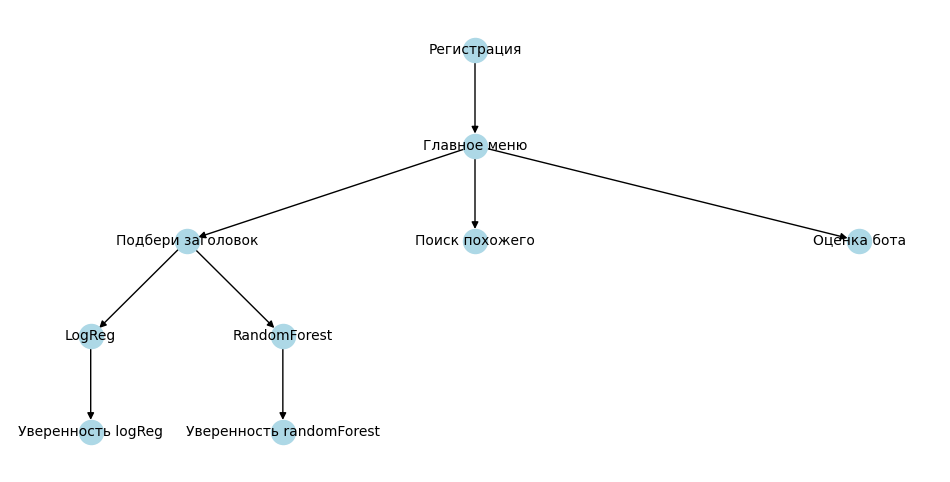

In [ ]:
# Визуализация состояний
# Установка позиций узлов
pos = {
    "Регистрация": (0, 5),
    "Главное меню": (0, 4),
    "Подбери заголовок": (-0.75, 3),
    "Поиск похожего": (0, 3),
    "Оценка бота": (1, 3),
    "LogReg": (-1, 2),
    "Уверенность logReg": (-1, 1),
    "RandomForest": (-0.5, 2),
    "Уверенность randomForest": (-0.5, 1)
}

fig, ax = plt.subplots(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, arrows=True)
plt.show()

In [ ]:
# Словарь для сопоставления человеко-читаемых названий с идентификаторами
node_to_state = {
    "Регистрация": BotStates.registration_state,
    "Главное меню": BotStates.main_menu_state,
    "Подбери заголовок": BotStates.choosing_model_state,
    "LogReg": BotStates.logreg_state,
    "Уверенность logReg": BotStates.lr_prob_state,
    "RandomForest": BotStates.randomforest_state,
    "Уверенность randomForest": BotStates.rf_prob_state,
    "Поиск похожего": BotStates.sim_state,
    "Оценка бота": BotStates.rate_state
}

class GraphNavigator:
    def __init__(self, graph, node):
        self.graph = graph
        self.current_node = node

    def move_to_node(self, node):
        if node in self.graph:
            self.current_node = node

    def get_parent(self):
        if self.current_node == "Регистрация":
            return "Регистрация"
        parent = list(self.graph.predecessors(self.current_node))[0]
        return parent

    def move_to_parent(self):
        self.current_node = self.get_parent()

    def get_current_node(self):
        return self.current_node

In [ ]:
test = GraphNavigator(G, "Главное меню")
test.get_parent()

'Регистрация'

### Кнопки (Клавиатуры) для бота

In [ ]:
# keyboards/keyboard_for_main_menu.py
def keyboard_for_main_menu() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Отнеси мою новость к нужной теме")
    kb.button(text="Найди новость похожую на мою")
    kb.button(text="Оценить бота")
    kb.button(text="Назад")
    kb.adjust(2)
    return kb.as_markup(resize_keyboard=True)

In [ ]:
# keyboards/keyboard_for_leaf_vertex.py
def keyboard_for_leaf_vertex() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text = "Назад")
    kb.adjust(1)
    return kb.as_markup(resize_keyboard=True)

In [ ]:
# keyboards/keyboard_for_choosing_models.py
def keyboard_for_choosing_models() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Логистическая регрессия")
    kb.button(text="Random Forest в разработке")
    kb.button(text="Назад")
    kb.adjust(1)
    return kb.as_markup(resize_keyboard=True)

In [ ]:
# keyboard/keyBoard_for_prob
def keyBoard_for_prob() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Покажи процент уверенности модели")
    kb.button(text="Назад")
    kb.adjust(1)
    return kb.as_markup(resize_keyboard=True)

In [ ]:
# keyboards/keyboard_for_rating.py
def keyboard_for_rating() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Плохо " + emoji.emojize(":face_with_symbols_on_mouth:"))
    kb.button(text="Хорошо 🙂")
    kb.button(text="Отлично 😀")
    kb.button(text="Назад")
    kb.adjust(2)
    return kb.as_markup(resize_keyboard=True)

In [ ]:
print(emoji.demojize("🎉"))

:party_popper:


###Хэндлеры для бота. По сути это обработчики сообщений от пользователя

In [ ]:
# handlers/start.py
# from keyboards/keyboard_for_start.py import get_keyBoard_for_start

router = Router()

# @router.message(StateFilter(None), Command("start"))
@router.message(Command("start"))
async def cmd_start(message: Message, state: FSMContext):
    # Очищаем сохраненные данные
    await state.clear()
    await state.update_data(navigator = "Регистрация")
    await message.answer(text="Для продолжения введите свое имя",
                         reply_markup = ReplyKeyboardRemove())
    # Устанавливаем пользователю состояние "Регистрация"
    await state.set_state(BotStates.registration_state)

In [ ]:
# handlers/registration_state.py
@router.message(BotStates.registration_state)
async def cmd_start(message: Message, state: FSMContext):
    await message.answer(
        text = f"Добро пожаловать, {message.text}!\nВыберите одну из опций",
        reply_markup = keyboard_for_main_menu()
    )
    # Устанавливаем пользователю состояние "Главное меню"
    await state.update_data(user_name = message.text)
    await state.update_data(navigator = "Главное меню")
    await state.set_state(BotStates.main_menu_state)

In [ ]:
# handlers/back.py
@router.message(F.text.lower() == "назад")
async def back_to_menue(message: Message, state: FSMContext):
    user_data = await state.get_data()
    current_state_name = user_data['navigator']
    graph_navigator = GraphNavigator(G, current_state_name)
    parent_state_name = graph_navigator.get_parent()
    parent_state = node_to_state[parent_state_name]
    if parent_state_name == "Регистрация":
        await message.answer(text="Введите свое имя",
                             reply_markup=ReplyKeyboardRemove())
    if parent_state_name == "Главное меню":
        await message.answer(text="Главное меню",
                             reply_markup = keyboard_for_main_menu())
    if parent_state_name == "Подбери заголовок":
        await message.answer(text="Попробуйте выбрать другую модель",
                             reply_markup = keyboard_for_choosing_models())
    if parent_state_name == "LogReg":
        await message.answer(text="Введите другую новость.\nВыбранная модель: LogReg",
                             reply_markup=keyboard_for_leaf_vertex())
    if parent_state_name == "RandomForest":
        await message.answer(text="Введите другую новость.\nВыбранная модель: LogReg (randomForest в разработке)",
                             reply_markup=keyboard_for_leaf_vertex())
    await state.update_data(navigator = parent_state_name)
    await state.set_state(state = parent_state)

In [ ]:
# handlers/main_menu_state.py
# from keyboards/keyboard_for_choosing_models.py import keyboard_for_choosing_models

# если в главном меню выбрали "отнеси мою новость к нужной теме"
@router.message(
    BotStates.main_menu_state,
    F.text.lower() == "отнеси мою новость к нужной теме"
)
async def task_chosen_topic(message: Message, state: FSMContext):
    await message.answer(
        text = "Теперь, пожалуйста, выберите модель",
        reply_markup = keyboard_for_choosing_models()
    )
    await state.update_data(navigator = "Подбери заголовок")
    await state.set_state(BotStates.choosing_model_state)

# если в главном меню выбрали "найди новость похожую на мою"
@router.message(
    BotStates.main_menu_state,
    F.text.lower() == "найди новость похожую на мою"
)
async def task_chosen_sim(message: Message, state: FSMContext):
    await message.answer(
        text = "Вы выбрали поиск похожей новости!\nТеперь вставьте сюда текст Вашей новости",
        reply_markup = keyboard_for_leaf_vertex()
    )
    await state.update_data(navigator = "Поиск похожего")
    await state.set_state(BotStates.sim_state)

# если в главном меню выбрали "Оценить юота"
@router.message(
    BotStates.main_menu_state,
    F.text.lower() == "оценить бота"
)
async def task_chosen_rate(message: Message, state: FSMContext):
    # Проверяем, оставлял ли пользователь оценку ранее
    user_data = await state.get_data()
    user_name = user_data['user_name']
    users = []
    try:
        async with aiofiles.open("rating", 'r') as file:
            async for line in file:
                users.append(line.split(':')[0].strip())
    except FileNotFoundError:
        users = []
    if user_name in users:
        await message.answer(
            text = "Пользователь с таким именем уже оценил бота❗️\nЧтобы изменить оценку нажмите на кнопку из списка ниже",
            reply_markup = keyboard_for_rating())
    else:
        await message.answer(
            text = "Спасибо, что решили оценить бота!\nВыберите оценку из списка ниже",
            reply_markup = keyboard_for_rating()
        )
    await state.update_data(navigator = "Оценка бота")
    await state.set_state(BotStates.rate_state)

In [ ]:
# handlers/choosing_models_state.py
# from keyboards/keyboard_for_choosing_models.py import keyboard_for_choosing_models

# Роутер для обработка запроса "LogReg"
# handlers/logreg.py
@router.message(BotStates.choosing_model_state,
                F.text.lower() == "логистическая регрессия")
async def log_reg_chosen(message: Message, state: FSMContext):
    await message.answer(
        text = "Поздравляю, вы выбрали логистическую регрессию! Теперь отправте боту Вашу новость",
        reply_markup = keyboard_for_leaf_vertex()
    )
    await state.update_data(navigator = "LogReg")
    await state.set_state(BotStates.logreg_state)

# Роутер для обработка запроса "RandomForest"
# handlers/random_forest.py
@router.message(BotStates.choosing_model_state,
                F.text.lower() == "random forest")
async def random_forest_chosen(message: Message, state: FSMContext):
    await message.answer(
        text = "К сожалению random forest еще в разработке, поэтому используемая модель логистическая регрессия. Теперь отправте боту Вашу новость",
        reply_markup = keyboard_for_leaf_vertex()
    )
    await state.update_data(navigator = "RandomForest")
    await state.set_state(BotStates.randomforest_state)

# Роутер для обработки некорректных вводов
# handlers/incorrect model.py
@router.message(BotStates.choosing_model_state,
                F.text.lower() != "назад")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    await message.answer(
        text = "Некорректный ввод.\n\n"
             "Пожалуйста, выберите модель из списка ниже:",
        reply_markup = keyboard_for_choosing_models()
    )

In [ ]:
node_to_sate = {
    "Регистрация": BotStates.registration_state,
    "Главное меню": BotStates.main_menu_state,
    "Подбери заголовок": BotStates.choosing_model_state,
    "LogReg": BotStates.logreg_state,
    "Уверенность logReg": BotStates.lr_prob_state,
    "RandomForest": BotStates.randomforest_state,
    "Уверенность randomForest": BotStates.rf_prob_state,
    "Поиск похожего": BotStates.sim_state,
    "Оценка приложения": BotStates.rate_state
}

In [ ]:
# Хэндлеры для обработки текстов новостей

# Вывод результата Лог рег
@router.message(BotStates.logreg_state)
async def log_reg_answer(message: Message, state: FSMContext):
    await state.update_data(predict_probabilities = format_predictions(predict_proba(message.text.lower()))) # запоминаем вероятности для следующего шага
    await message.answer(
        text = predict_lr(message.text.lower()),
        reply_markup = keyBoard_for_prob()
    )
    await state.update_data(navigator = "Уверенность logReg")
    await state.set_state(BotStates.lr_prob_state)

# Вывод результата Random Forest
# handlers/text_analysis_by_randomForesr.py
@router.message(BotStates.randomforest_state)
async def log_reg_answer(message: Message, state: FSMContext):
    await state.update_data(predict_probabilities = format_predictions(predict_proba(message.text.lower()))) # запоминаем вероятности для следующего шага
    await message.answer(
        text = predict_lr(message.text.lower()),
        reply_markup = keyBoard_for_prob()
    )
    await state.update_data(navigator = "Уверенность randomForest")
    await state.set_state(BotStates.lr_prob_state)

# Вывод результата Similar_text
# handlers/similar_search.py
@router.message(BotStates.sim_state)
async def raandom_forest_answer(message: Message, state: FSMContext):
    await message.answer(
        text = get_sim_text(message.text.lower()),
        reply_markup = keyboard_for_leaf_vertex()
    )

In [ ]:
# Хэндлеры для обработки запросов уверенности
# handlers/lr_prob.py
@router.message(BotStates.lr_prob_state,
                F.text.lower() == "покажи процент уверенности модели")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    user_data = await state.get_data()
    await message.answer(
        text = user_data['predict_probabilities'],
        reply_markup = keyboard_for_leaf_vertex()
    )

# handlers/rf_prob.py
@router.message(BotStates.rf_prob_state,
                F.text.lower() == "покажи процент уверенности модели")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    user_data = await state.get_data()
    await message.answer(
        text = user_data['predict_probabilities'],
        reply_markup = keyboard_for_leaf_vertex()
    )

In [ ]:
# Хэндлеры для оценки работы бота
# handlers/lr_prob.py
@router.message(BotStates.rate_state,
                F.text.lower() == "плохо 🤬")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    user_data = await state.get_data()
    await message.answer(
        text = f"Жаль, что Вам не понравилось, {user_data['user_name']}( Мы постараемся доработать бота",
        reply_markup = keyboard_for_main_menu()
    )
    async with aiofiles.open("rating", mode='a') as file:
        await file.write(f"{user_data['user_name']}: плохо\n")
    await state.update_data(navigator = "Главное меню")
    await state.set_state(BotStates.main_menu_state)


# Хэндлеры для оценки работы бота
# handlers/lr_prob.py
@router.message(BotStates.rate_state,
                F.text.lower() == "хорошо 🙂")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    user_data = await state.get_data()
    await message.answer(
        text = f"Спасибо за оценку, {user_data['user_name']}! Скоро выйдет обновление и бот станет еще лучше!",
        reply_markup = keyboard_for_main_menu()
    )
    async with aiofiles.open("rating", mode='a') as file:
        await file.write(f"{user_data['user_name']}: хорошо\n")
    await state.update_data(navigator = "Главное меню")
    await state.set_state(BotStates.main_menu_state)

# Хэндлеры для оценки работы бота
# handlers/lr_prob.py
@router.message(BotStates.rate_state,
                F.text.lower() == "отлично 😀")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    user_data = await state.get_data()
    await message.answer(text="" + emoji.emojize(":party_popper:"))
    await message.answer(
        text = f"Мы рады, что Вам понравилось, {user_data['user_name']}!",
        reply_markup = keyboard_for_main_menu()
    )
    async with aiofiles.open("rating", mode='a') as file:
        await file.write(f"{user_data['user_name']}: отлично\n")
    await state.update_data(navigator = "Главное меню")
    await state.set_state(BotStates.main_menu_state)

In [ ]:
# Роутер для помощи со стартом
@router.message(StateFilter(None))
async def help_with_start(message: Message, state: FSMContext):
    await message.answer(
        text = "Этот бот помогает обрабатывать новости, для начала работы пропишите /start",
        reply_markup = ReplyKeyboardRemove()
    )

# Роутер для обработки некорректных вводов
@router.message()
async def incorrect_imput(message: Message, state: FSMContext):
    await message.answer(
        text = "Некорректный ввод.\n"
             "Пожалуйста, выберите одно из списка ниже:"
    )

###bot.py - Точка входа в приложение

In [ ]:
# @title
# Включаем логирование, чтобы не пропустить важные сообщения
logging.basicConfig(level=logging.INFO)

# Запуск бота
async def main():
    bot = Bot(token="6708563519:AAHaTh5VfMYpkCUu8gHsBkCxIBGaY8mfOLo")
    dp = Dispatcher()
    dp.include_router(router)
    # Запускаем бота и пропускаем все накопленные входящие
    # Да, этот метод можно вызвать даже если у вас поллинг
    await bot.delete_webhook(drop_pending_updates=True)
    await dp.start_polling(bot)

await main()

# Если код запускакется не в колабе или юпитере
# if __name__ == "__main__":
#     asyncio.run(main())